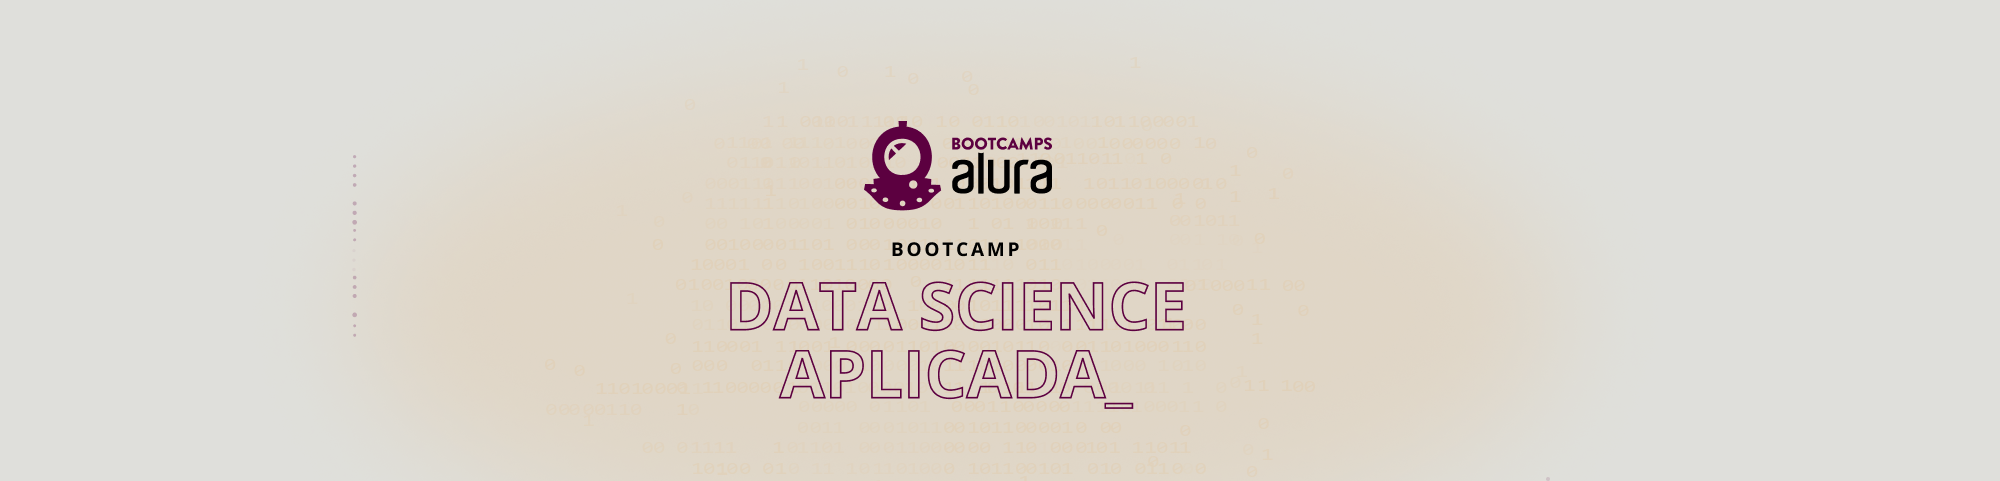

# **Module 01**

**[DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=02) data exploration notebook**

In this module we explore data extracted from the Brazilian government's health data set, which shows the hospital environment spending, in SUS, as of 2008.

# **2. Inicialazing data manipulation**

In [333]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set()

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [334]:
link_dados = 'https://github.com/SaraZachi/BootCamp-2021/blob/main/Aula%202/Data/A160324189_28_143_208.csv?raw=true'
dados = pd.read_csv(link_dados,encoding = 'ISO-8859-1',
                    skiprows = 3, sep=';',skipfooter=12,
                    thousands = ".", decimal =',')
dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,8341

In [335]:
#transformin scientific number configuration
pd.options.display.float_format = "{:.2f}".format

In [336]:
dados[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [337]:
# Selecting / separating only columns with non-null values

## For this, it was necessary to: 
## 1) identify the columns with non-null values;
## 2) define the index of non-null columns to perform the slice later;
## 3) insert/add the 'Unidade da Federação' column in the position zero of the index.

## For the 3rd step it was necessary to add '.tolist ()' to the first line of the code 
## in order to transform 'colunas_usaveis' into a python list, which is mutable, as opposed
## to .index, which is immutable.

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [338]:
# Slice of months/year with non-zero values
usaveis = dados[colunas_usaveis]
usaveis

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [339]:
# Returning 'Unidade da Federação' as the index for our new slice
usaveis = usaveis.set_index('Unidade da Federação')
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [340]:
# Transposing (T) the Data Frame (DF)
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,17319947.66,15386630.89,53843729.23,14241361.44,8395906.57,59109689.20,126330649.86,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,19916570.52,18970543.57,65424719.40,15254204.31,8450209.57,61756775.71,136867275.75,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,20219961.81,19666096.87,68145110.59,14278872.07,6705923.03,65159300.63,135977571.87,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,19593057.45,15491469.06,62325444.34,13087850.40,3312766.32,58898100.40,120467187.34,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
Total,929129659.72,420668039.63,1771654871.23,305010883.18,4437115730.71,291637984.75,999998621.85,3632860959.84,2130616492.35,6197357245.98,2477372149.60,2470550104.25,8046954289.39,2104405303.11,1130337049.71,9193802684.16,19160106499.88,3139189177.73,9696362872.68,38929353900.57,13786964617.27,7324100054.96,11958647088.33,2172157981.36,2036923784.59,4657348958.66,2429933198.76


In [341]:
# Remooving/droping (drop) the line 'Total' from the DF
usaveis = usaveis.drop('Total', axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

In [342]:
# Locating 5 first lines within the column '2019/Ago'
usaveis['2019/Ago'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [343]:
# Locating (loc) specific index line
usaveis.loc['12 Acre']

2007/Ago     10470.07
2007/Set     14001.71
2007/Out     86200.85
2007/Nov    301323.68
2007/Dez    769612.36
              ...    
2020/Mar   2859102.06
2020/Abr   2472063.08
2020/Mai   2383895.48
2020/Jun   2199920.70
2020/Jul   1163813.08
Name: 12 Acre, Length: 156, dtype: float64

## **Challenges**

In [344]:
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

**Challenge 2.1. Reposicionar a legenda do gráfico em uma posição mais adequada**

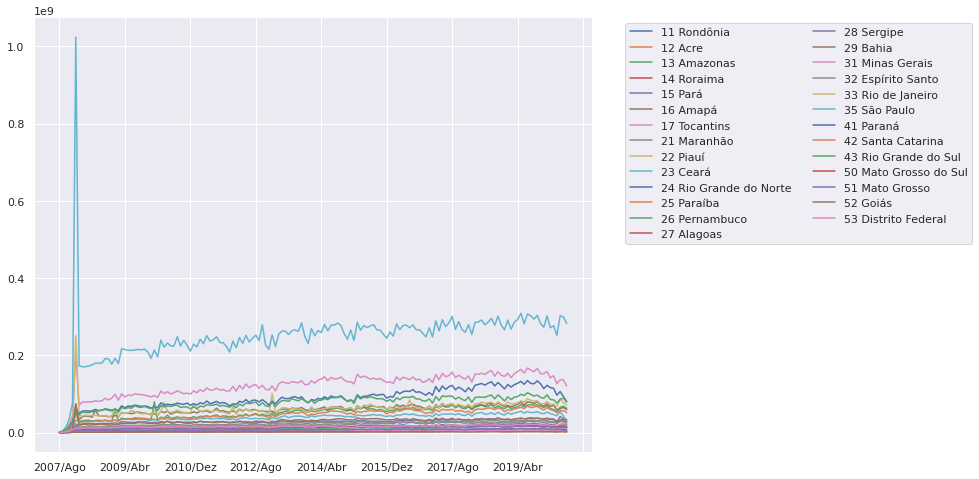

In [345]:
usaveis.T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=2)

**Challenge 2.2. Reposicionar a legenda do gráfico em uma posição mais adequada**

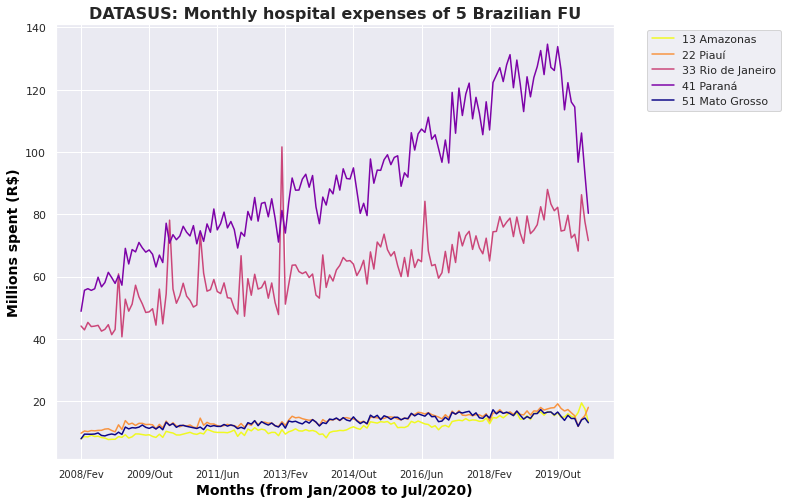

In [346]:
uf_selected = ['13 Amazonas','22 Piauí','33 Rio de Janeiro','41 Paraná','51 Mato Grosso'] #selecting 5 Federation Units
cinco_uf = usaveis.T.loc[:, uf_selected]/1000000 #making a slice of the 5 Federation Units.

chart = cinco_uf[6:].plot(figsize=(10,8), cmap=plt.get_cmap('plasma_r'))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.title('DATASUS: Monthly hospital expenses of 5 Brazilian FU', fontsize=16, 
          fontweight='bold')

plt.xticks(fontsize=10)

chart.set_xlabel('Months (from Jan/2008 to Jul/2020)', fontsize=14, fontweight='bold', color='#000000')
chart.set_ylabel('Millions spent (R$)', fontsize=14, fontweight='bold', color='#000000')

plt.show()

# **3. Data manipulation**

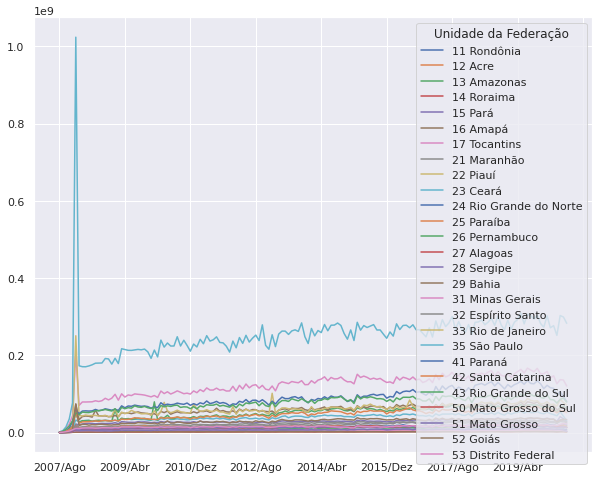

In [347]:
usaveis.T.plot(figsize=(10,8))

In [348]:
usaveis.T.columns[2:7]

Index(['13 Amazonas', '14 Roraima', '15 Pará', '16 Amapá', '17 Tocantins'], dtype='object', name='Unidade da Federação')

In [349]:
usaveis.index[2:7]

Index(['13 Amazonas', '14 Roraima', '15 Pará', '16 Amapá', '17 Tocantins'], dtype='object', name='Unidade da Federação')

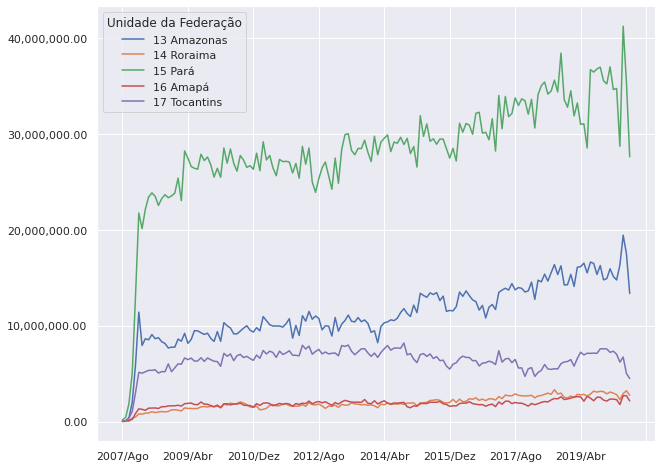

In [350]:
ax = usaveis[2:7].T.plot(figsize=(10,8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

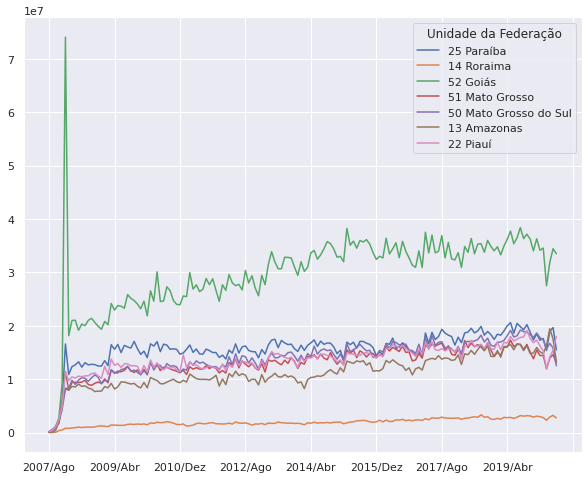

In [351]:
# Ploting a chart with a fixed seed number=120
np.random.seed(120)
usaveis.sample(n=7).T.plot(figsize=(10,8))

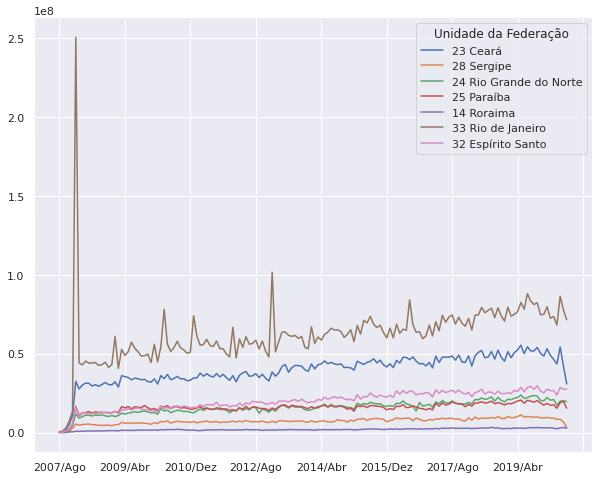

In [352]:
# Poting a chart with random seeds
usaveis.sample(n=7).T.plot(figsize=(10,8))

In [353]:
# Adicionando uma coluna já existente
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [354]:
usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [355]:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis='columns')
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

In [356]:
sem_outlier = ordenado_por_total.columns[6:] #excluding columns we dont want
ordenado_por_total = ordenado_por_total[sem_outlier] #adding our new selection to the variable 'ordenado_por_total' and atributing its new value
ordenado_por_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,5

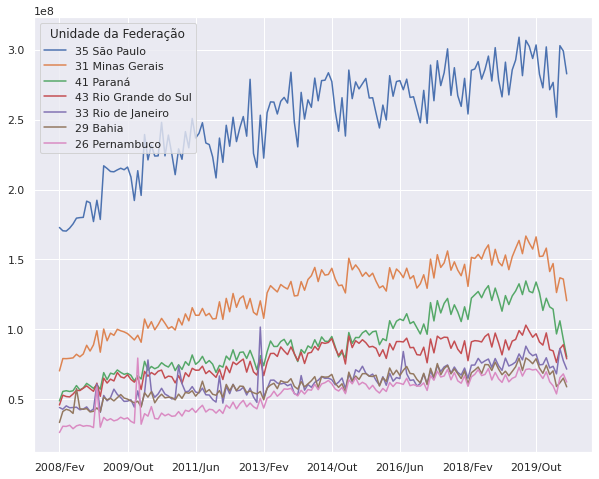

In [357]:
ordenado_por_total[:7].T.plot(figsize=(10,8))

É importante obsevar os resultados da análise dos dados e buscar entender o que pode ter causado determinados padrões, por exemplo, de modo a explicar seus resultados da melhor e mais coerente maneira possível.

## **Challenges**

**Desafio 3.1. Escolher uma palete de cores mais adequada do matplotlib.**

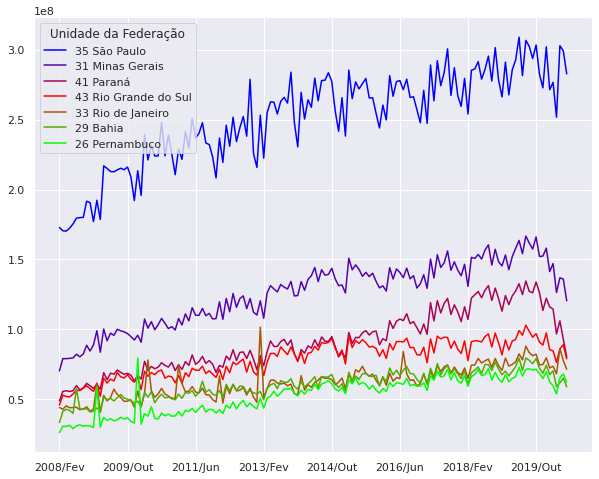

In [358]:
ordenado_por_total[:7].T.plot(figsize=(10,8), cmap=plt.get_cmap('brg'))

**Desafio 3.2. Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.**


In [359]:
data = ordenado_por_total / 1000000

regions_brasil = {'1' : 'Norte',
           '2' : 'Nordeste',
           '3' : 'Sudeste',
           '4' : 'Sul',
           '5' : 'Centro-Oeste'}
regions_loc = [regions_brasil[idx[0]] for idx in data.index]
regions = data.copy()
regions['Região'] = regions_loc
regions = regions[np.roll(regions.columns,1)]
regions

,Região,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
31 Minas Gerais,Sudeste,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
41 Paraná,Sul,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
43 Rio Grande do Sul,Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
33 Rio de Janeiro,Sudeste,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54
29 Bahia,Nordeste,33.41,41.30,42.83,42.07,39.91,57.66,43.25,42.85,43.33,40.95,41.42,43.86,41.09,51.48,49.59,50.69,48.85,51.08,53.39,50.89,50.11,48.79,47.43,48.61,44.51,54.61,51.54,55.44,47.48,51.15,53.63,51.01,51.50,51.21,49.58,53.68,50.66,54.92,54.32,...,65.65,75.55,67.49,71.95,74.15,68.14,71.75,68.34,64.80,70.34,60.86,68.98,70.89,73.08,68.37,74.88,74.70,70.62,76.59,71.54,67.57,70.10,66.81,69.94,73.28,79.41,70.57,79.57,77.85,75.44,78.99,72.31,68.58,74.37,67.70,70.34,59.11,61.76,65.16,58.90
26 Perna

In [360]:
estados_norte = regions["Região"] == "Norte"
estados_norte

Unidade da Federação
35 São Paulo              False
31 Minas Gerais           False
41 Paraná                 False
43 Rio Grande do Sul      False
33 Rio de Janeiro         False
29 Bahia                  False
26 Pernambuco             False
42 Santa Catarina         False
23 Ceará                  False
52 Goiás                  False
15 Pará                    True
21 Maranhão               False
32 Espírito Santo         False
24 Rio Grande do Norte    False
25 Paraíba                False
53 Distrito Federal       False
50 Mato Grosso do Sul     False
22 Piauí                  False
27 Alagoas                False
51 Mato Grosso            False
13 Amazonas                True
28 Sergipe                False
17 Tocantins               True
11 Rondônia                True
12 Acre                    True
14 Roraima                 True
16 Amapá                   True
Name: Região, dtype: bool

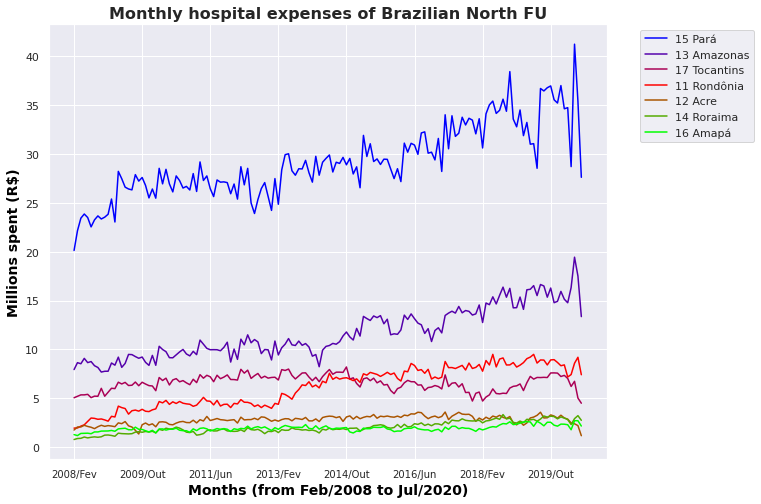

In [375]:
region_plot = data[estados_norte].T.plot(figsize=(10,8), cmap=plt.get_cmap('brg'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.title('Monthly hospital expenses of Brazilian North FU', fontsize=16, 
          fontweight='bold')

plt.xticks(fontsize=10)

region_plot.set_xlabel('Months (from Feb/2008 to Jul/2020)', fontsize=14, fontweight='bold', color='#000000')
region_plot.set_ylabel('Millions spent (R$)', fontsize=14, fontweight='bold', color='#000000')

plt.show()


**Desafio 3.3. Formatar o gráfico de custos por mês dos 5 estados, deixando ele Bonitão**

**Desafio 3.4. Adicione o seu estado aos 5 estados plotados**

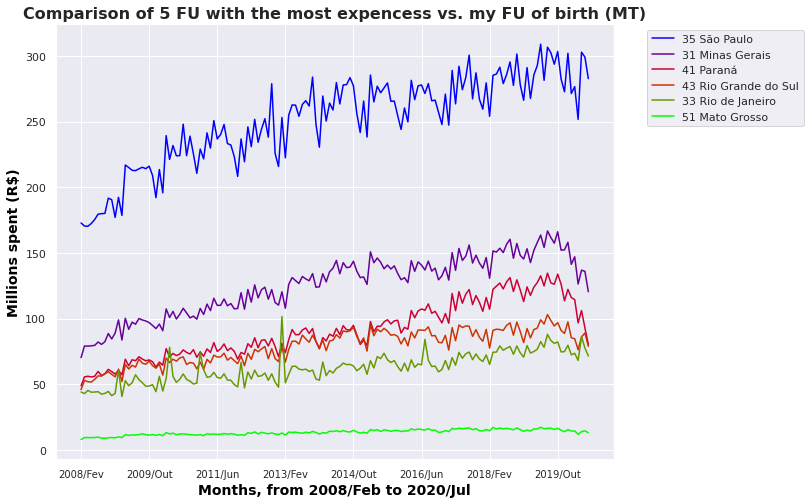

In [362]:
new_data_plot = data[:5].index.tolist() # listing the top 5 FU
new_data_plot.append('51 Mato Grosso') # adding my FU to the end of the list
ax = data.T[new_data_plot].plot(figsize=(10,8), cmap=plt.get_cmap('brg'))

plt.legend(bbox_to_anchor=(1.05, 1))

plt.xticks(fontsize=10)

plt.title('Comparison of 5 FU with the most expencess vs. my FU of birth (MT)', fontsize=16, 
          fontweight='bold')

ax.set_xlabel('Months, from 2008/Feb to 2020/Jul', fontsize=14, fontname = "Arial", fontweight='bold', color='#000000')
ax.set_ylabel('Millions spent (R$)', fontsize=14, fontname = "Arial", fontweight='bold', color='#000000')

plt.show()

**Desafio 3.5. Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue**

**Desafio 3.2. Plotar o gráfico de linha com apenas 5 estados de sua preferência**

# **4. Análise de gráficos e criação de hipótese**

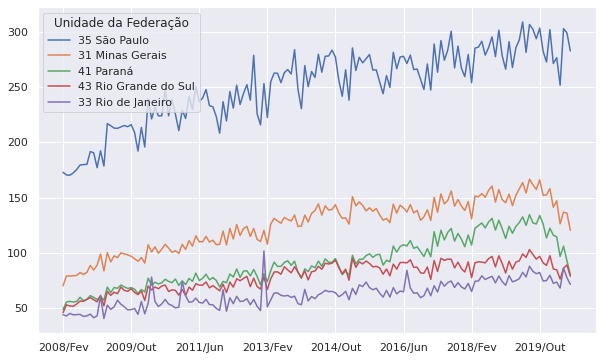

In [363]:
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.head(5).T.plot(figsize=(10,6))

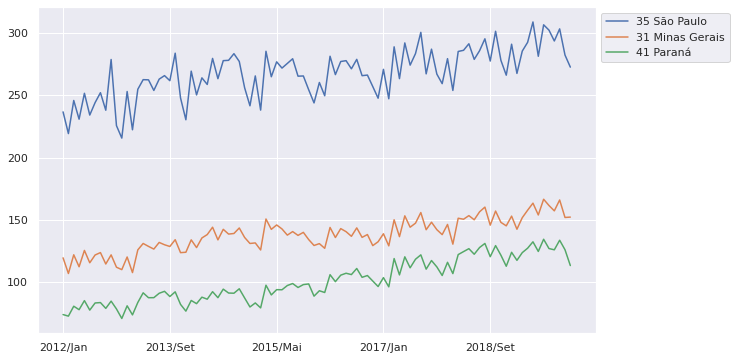

In [364]:
meses_filtrados = ordenado_por_total.columns[47:143]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 1))

(0.0, 350.0)

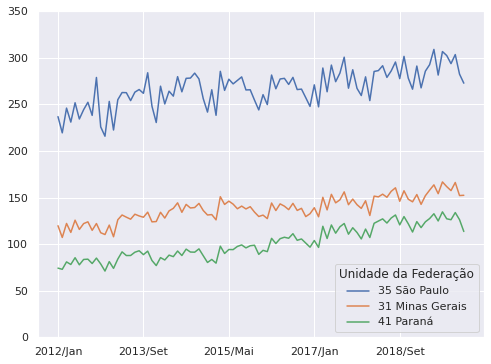

In [365]:
 ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(8,6))
 plt.ylim(0, 350) #plot the y axis within the range: 0 to 350

## **Challenges**

**Challenge 4.1. Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações**

**Challenge 4.2. Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.**

# **5. Graph manipulation and interpretation**

In [366]:
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2020/Jun'

In [367]:
gastos_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mais_recente.head()

Unidade da Federação
35 São Paulo           299.06
31 Minas Gerais        135.98
41 Paraná               92.90
43 Rio Grande do Sul    89.02
33 Rio de Janeiro       77.60
Name: 2020/Jun, dtype: float64

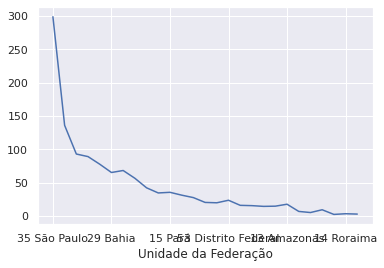

In [368]:
gastos_mais_recente.plot()

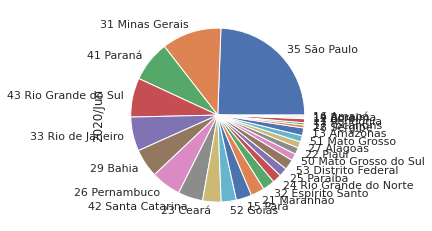

In [369]:
gastos_mais_recente.plot(kind='pie')

**Horrores do gráfico de pizza atual:**
* a distribuição das legendas é inviável
* número muito grande de fatias

**Vantagem desse gráfico de pizza:**
* vem ordenado



In [370]:
# Sample shufle = fraction
shufle_mais_recente = gastos_mais_recente.sample(frac=1)
shufle_mais_recente

Unidade da Federação
53 Distrito Federal       23.48
51 Mato Grosso            14.59
27 Alagoas                14.28
43 Rio Grande do Sul      89.02
13 Amazonas               17.51
32 Espírito Santo         27.45
31 Minas Gerais          135.98
41 Paraná                 92.90
17 Tocantins               5.02
25 Paraíba                19.67
24 Rio Grande do Norte    20.22
15 Pará                   35.40
50 Mato Grosso do Sul     15.84
28 Sergipe                 6.71
16 Amapá                   2.70
35 São Paulo             299.06
26 Pernambuco             68.15
14 Roraima                 3.22
42 Santa Catarina         56.50
52 Goiás                  34.44
21 Maranhão               31.13
23 Ceará                  42.15
33 Rio de Janeiro         77.60
12 Acre                    2.20
11 Rondônia                9.19
29 Bahia                  65.16
22 Piauí                  15.38
Name: 2020/Jun, dtype: float64

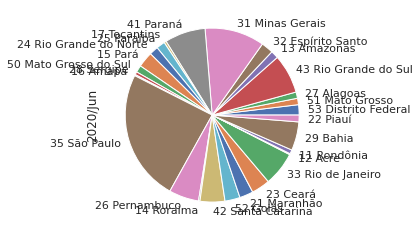

In [371]:
shufle_mais_recente.plot(kind='pie') #fica uma confusão o gráfico não ordenado

**Porque um gráfico de pizza pode ser inviável:**
* a distribuição das legendas é inviável
* número muito grande de fatias
* não dá para saber a ordem
* cores repitidas
* não temos uma ideia da proporção
* impossível comparar informações (grandeza, proporção, etc)

In [372]:
gastos_mais_recente

Unidade da Federação
35 São Paulo             299.06
31 Minas Gerais          135.98
41 Paraná                 92.90
43 Rio Grande do Sul      89.02
33 Rio de Janeiro         77.60
29 Bahia                  65.16
26 Pernambuco             68.15
42 Santa Catarina         56.50
23 Ceará                  42.15
52 Goiás                  34.44
15 Pará                   35.40
21 Maranhão               31.13
32 Espírito Santo         27.45
24 Rio Grande do Norte    20.22
25 Paraíba                19.67
53 Distrito Federal       23.48
50 Mato Grosso do Sul     15.84
22 Piauí                  15.38
27 Alagoas                14.28
51 Mato Grosso            14.59
13 Amazonas               17.51
28 Sergipe                 6.71
17 Tocantins               5.02
11 Rondônia                9.19
12 Acre                    2.20
14 Roraima                 3.22
16 Amapá                   2.70
Name: 2020/Jun, dtype: float64

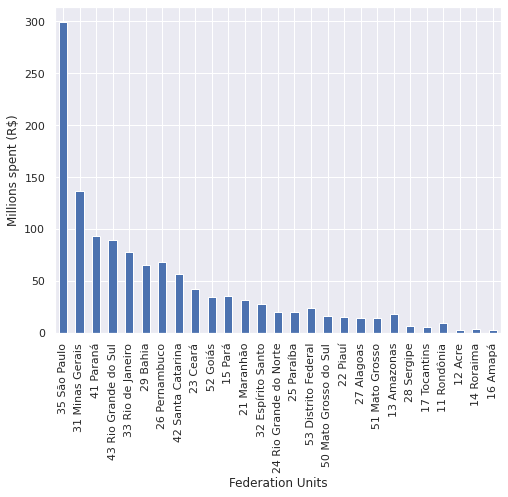

In [373]:
gastos_mais_recente.plot(figsize=(8,6), kind='bar', ylabel='Millions spent (R$)', xlabel='Federation Units')

plt.show()

## **Challenges**

**Challenge 5.1. Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.**

In [ ]:
gastos_mais_recente = gastos_mais_recente.sort_values(ascending=False) #chart with sorted values
gastos_mais_recente.plot(figsize=(8,6), kind='bar', ylabel='Millions spent (R$)', xlabel='Federation Units')

# plt.grid() -> essa seria a forma de adicionar um grid. Mas, como já adicionaei no início
# do notebook um estilo padrão de gráficos com grid para todos meus plots ('sns.set()'), não 
# foi necessário adicionar o comando 'plt.grid()'.

plt.show()

**Challenge 5.2. Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.**

In [ ]:
gastos = gastos_mais_recente / gastos_mais_recente.loc['51 Mato Grosso']
gastos = gastos.sort_values(ascending=False) #chart with sorted values

gastos.plot(figsize=(8,6), kind='bar', ylabel='Millions spent (R$)', xlabel='Federation Units')

plt.title("Proportion of all FU recent espences in relation to Mato Grosso", fontsize=16, 
          fontweight='bold')

plt.show()

**Challenge 5.3. Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.**

**Challenge 5.4. Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.**

**Challenge 5.5. Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.**